In [12]:
# Practice solving ODEs and SDEs
# Fit rainfall-runoff for Chosen  dataset
# Jan 26, 2021, Omar Wani

# source for ODE solution
# https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations

import numpy as np
from scipy.integrate import odeint
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import statsmodels as sm            # for autocorellation function
import os

In [16]:
path = '/home/owani/Office/Berkeley/Scripts'
os.chdir(path)

$dy/dt=-kt$ (try the easy ode)

<ipython-input-3-5d93917ef055>:4: RuntimeWarning: invalid value encountered in sqrt
  dydt = -k*(y*500)**0.5


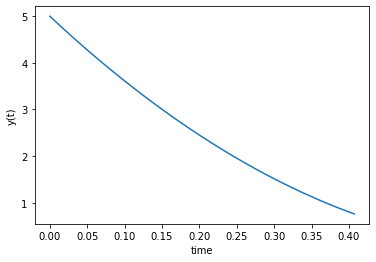

In [3]:

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k*(y*500)**0.5
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,1,10000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

# Rainfall-runoff model

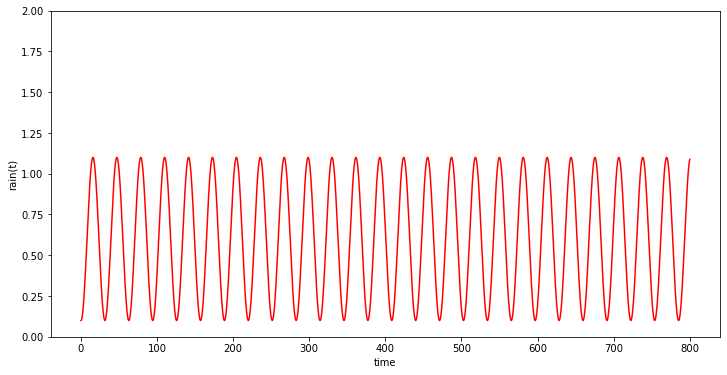

In [4]:
t = np.linspace(0,800,8000)
rain = (np.sin(t*0.1))**2+0.1
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(t, rain, color='red', label='Sine wave')
plt.xlabel('time')
plt.ylabel('rain(t)')
plt.ylim([0,2])

plt.show()

In [5]:
#np.random.seed(1)
t = np.linspace(0,800,8000)
rain = (np.sin(t*0.1))**2+0.1

beta = 0.1  # Standard deviation.
K = 5.0  # Mean.

dt = 0.1  # Time step.
T = 800.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

sim =2
xo = np.zeros([n,sim])

for j in range(sim-1):
    for i in range(n - 1):
        xo[i + 1,j] = xo[i,j] + rain[i]*dt -1/K*(1+beta/2)*xo[i,j]*dt #+ \
        #np.sqrt(beta/K)*x[i,j]*np.random.normal(0,np.sqrt(dt),1)



In [6]:
np.random.seed(1)
t = np.linspace(0,800,8000)
rain = (np.sin(t*0.1))**2+0.1

beta = 0.1  # 
K = 5.0  # 

dt = 0.1  # Time step.
T = 800.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

x = np.zeros([n,100])

for j in range(99):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + rain[i]*dt -1/K*(1+beta/2)*x[i,j]*dt + \
        np.sqrt(beta/K)*x[i,j]*np.random.normal(0,np.sqrt(dt),1)


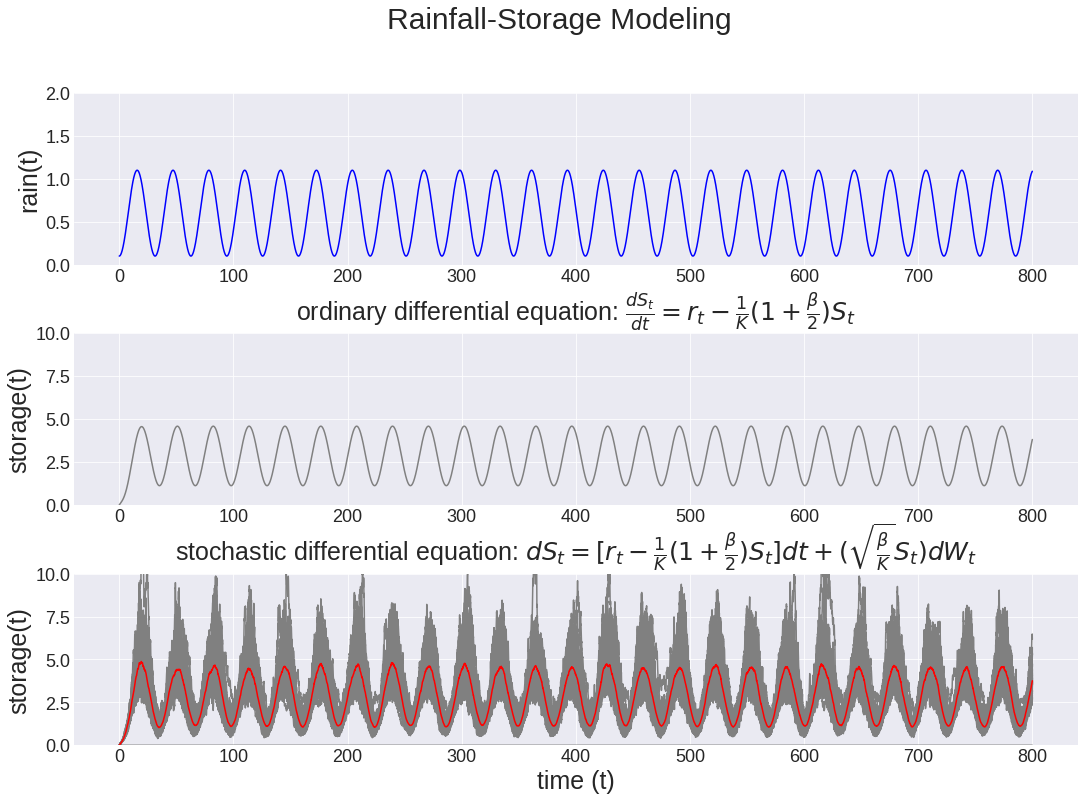

In [18]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(3,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,xo[:,0], color = 'gray')
ax[2].plot(t,x, color = 'gray')
ax[2].plot(t,x.mean(axis=1), color = 'red')

ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

ax[1].set_ylim([0,10])
ax[1].set_xlabel('', fontsize = 25)
ax[1].set_ylabel('storage(t)', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=18)
ax[1].set_title('ordinary differential equation: ' r'$\frac{dS_t}{dt}= r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t$', fontsize =25)

ax[2].set_ylim([0,10])
ax[2].set_xlabel('time (t)', fontsize = 25)
ax[2].set_ylabel('storage(t)', fontsize = 25)
ax[2].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[2].tick_params(axis='both', which='major', labelsize=18)
fig.savefig('SDE_test.jpg',dpi = 150)

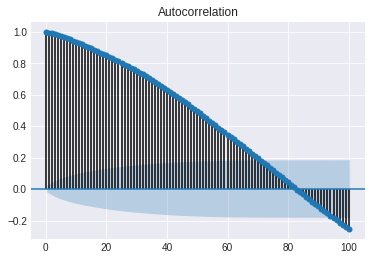

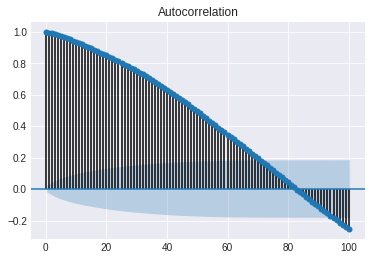

In [832]:
#sm.api.graphics.tsa.plot_acf(xo[:,0], lags=100)
sm.api.graphics.tsa.plot_acf(x[:,1], lags=100)


In [74]:
# Use the storage-discharge relationship from Kirchner, 2009
#np.random.seed(1)
t = np.linspace(0,800,8000)
rain = (np.sin(t*0.1))**2+0.1

beta = 0.1  # Standard deviation.
K = 50.0  # Mean.
a = 0.4
b= 2.3

dt = 0.1  # Time step.
T = 800.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

sim =2
xo = 3*np.ones([n,sim])

for j in range(sim-1):
    for i in range(n - 1):
        xo[i + 1,j] = xo[i,j] + rain[i]*dt -(((2-b)*a*(xo[i,j]-K))**(2-b))*dt

In [75]:
np.random.seed(1)
t = np.linspace(0,800,8000)
rain = (np.sin(t*0.1))**2+0.1

beta = 0.01  # 
K = 50.0  # 
a = 0.4
b= 2.3

dt = 0.1  # Time step.
T = 800.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

x = np.zeros([n,100])
x = 3*np.ones([n,100])

for j in range(99):
    for i in range(n - 1):
        x[i + 1,j] = x[i,j] + rain[i]*dt -(((2-b)*a*(x[i,j]-K))**(2-b))*dt + \
        np.sqrt(beta/K)*x[i,j]*np.random.normal(0,np.sqrt(dt),1)


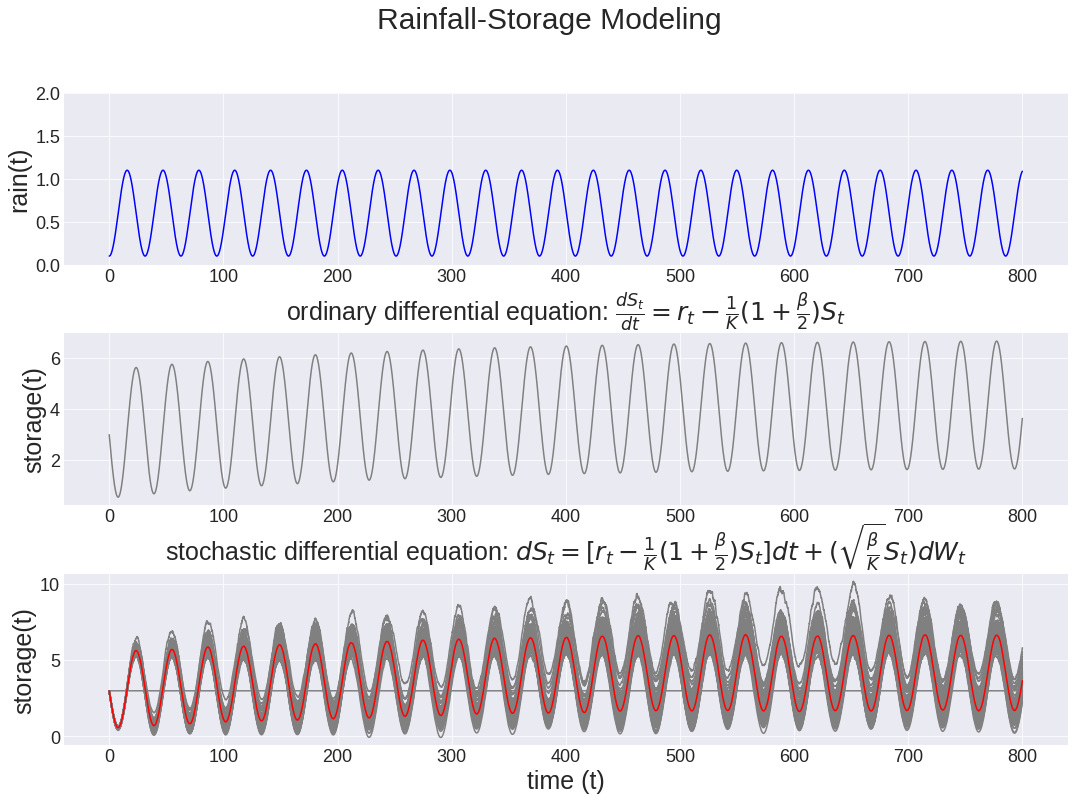

In [76]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(3,figsize=(18, 12))
fig.suptitle('Rainfall-Storage Modeling', fontsize =30)
fig.subplots_adjust(hspace = 0.4)

ax[0].plot(t, rain, color='blue')
ax[1].plot(t,xo[:,0], color = 'gray')
ax[2].plot(t,x, color = 'gray')
ax[2].plot(t,x.mean(axis=1), color = 'red')

ax[0].set_ylim([0,2])
ax[0].set_xlabel('', fontsize = 25)
ax[0].set_ylabel('rain(t)', fontsize = 25)
ax[0].tick_params(axis='both', which='major', labelsize=18)

#ax[1].set_ylim([0,10])
ax[1].set_xlabel('', fontsize = 25)
ax[1].set_ylabel('storage(t)', fontsize = 25)
ax[1].tick_params(axis='both', which='major', labelsize=18)
ax[1].set_title('ordinary differential equation: ' r'$\frac{dS_t}{dt}= r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t$', fontsize =25)

#ax[2].set_ylim([0,10])
ax[2].set_xlabel('time (t)', fontsize = 25)
ax[2].set_ylabel('storage(t)', fontsize = 25)
ax[2].set_title('stochastic differential equation: ' r'$dS_t= [r_t-\frac{1}{K}(1+\frac{\beta}{2})S_t]dt+(\sqrt{\frac{\beta}{K}}S_t)dW_t$', fontsize =25)
ax[2].tick_params(axis='both', which='major', labelsize=18)
#fig.savefig('SDE_test.jpg',dpi = 150)

# Fit the SDE to CHOSEN dataset

In [336]:
# import data (Scripting by Liang Zhang)

In [328]:
import pandas as pd
import datetime as dt
import copy
from pandas.plotting import register_matplotlib_converters
import copy
import os
import netCDF4 as nc4            # to work with netCDFs
import time

register_matplotlib_converters()
os.getcwd()

'/home/owani/Office/Berkeley/Scripts'

In [338]:
watershed = ['1-EastRiver', '2-DryCreek','3-Sagehen','4-HJAndrews','5-Baltimore',
             '6-Bonanza','7-CCE','8-CentralArizona','9-Coweeta','10-Florida',
             '11-Georgia','12-Harvard','13-Hubbard','14-Jornada','15-Kellogg',
             '16-KonzaPrairie','17-NGA','18-PlumIsland','19-Sevilleta','20-Boulder',
             '21-Catalina','22-Jemez','23-WhiteClay','24-Luquillo','25-Reynolds',
             '26-ShaleHill','27-SanJoaquin','28-Providence','29-Wolverton','30-Calhoun']

In [331]:
path = '/home/owani/Office/Berkeley//Data_Zhang/chosen-master/DataProduct'

In [332]:
ws='EastRiver'
File=ws+'_NetCDF.nc'
ncdf = nc4.Dataset(path +'/'+ File, 'r')

In [333]:
# date - time info
def get_time_range(watershed_number):
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    dt_lst=[pd.to_datetime(i) for i in ncdf.variables['Datetime'][:]]
    ncdf.close()
    print(ws+' data is from', dt_lst[0], 'to',dt_lst[-1])
    #return [str(dt_lst[0]),str(dt_lst[1])]

In [334]:
# station info
def get_station_name(watershed_number):
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'][:]
    ncdf.close()
    return stn_names
def get_station_latitude(watershed_number):
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'].Latitude
    ncdf.close()
    return stn_names
def get_station_longitude(watershed_number):
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'].Longitude
    ncdf.close()
    return stn_names
def get_station_elevation(watershed_number): # in meter
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    stn_names=ncdf.variables['Grid'].Elevation_m
    ncdf.close()
    return stn_names

In [335]:
# extract data table
def get_data(watershed_number,variable_names_lst=[]): # variable_names_lst=[] to get all the data
    ws=watershed[watershed_number-1].split('-')[1]
    print(ws)
    File=ws+'_NetCDF.nc'
    ncdf = nc4.Dataset(path +'/'+ File, 'r')
    keys_lst=list(ncdf.variables.keys())
    len_keys=len(keys_lst)
    print("Hydrometeorological variables in this watershed are:")
    all_variables=keys_lst[2:int(len_keys/2)]
    print(all_variables)
    if variable_names_lst==[]:
        for i,var in enumerate(all_variables):
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), 
                                        str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, 
                                columns = [ncdf.variables[var].names])
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')
    else:
        for i,var in enumerate(variable_names_lst):
            indexUnique = pd.date_range(str(pd.to_datetime(ncdf.variables['Datetime'][:][0])), 
                                        str(pd.to_datetime(ncdf.variables['Datetime'][:][-1])))  
            
            if ncdf.variables[var][:].shape[1]==1:
                var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, columns = [ncdf.variables[var].names])
            else:
                var_df=pd.DataFrame(ncdf.variables[var][:], index=indexUnique, columns = ncdf.variables[var].names)
            
            if i==0:
                former_df=var_df
            else:
                former_df=pd.concat([former_df,var_df],axis=1,join='outer')      
    ncdf.close()
    former_df.index.rename('DateTime',inplace = True)
    return former_df

EastRiver
EastRiver
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'SnowDepth', 'SoilMoisture']
EastRiver
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'SnowDepth', 'SoilMoisture']


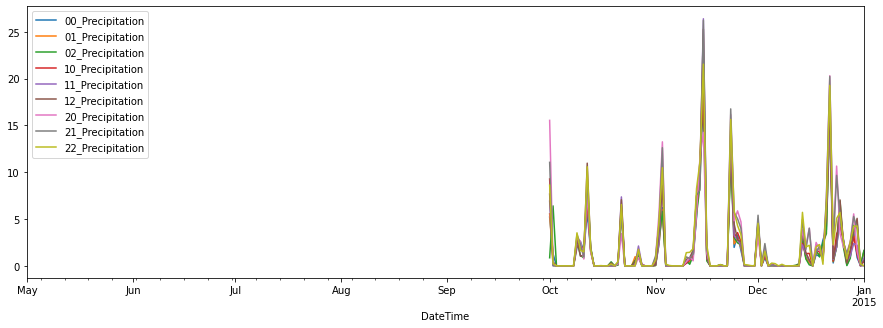

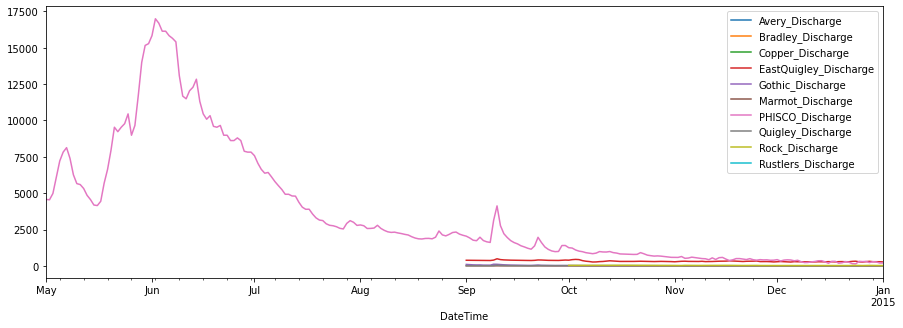

In [462]:
get_station_name(1)
get_data(1,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(1,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

DryCreek
DryCreek
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']
DryCreek
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']


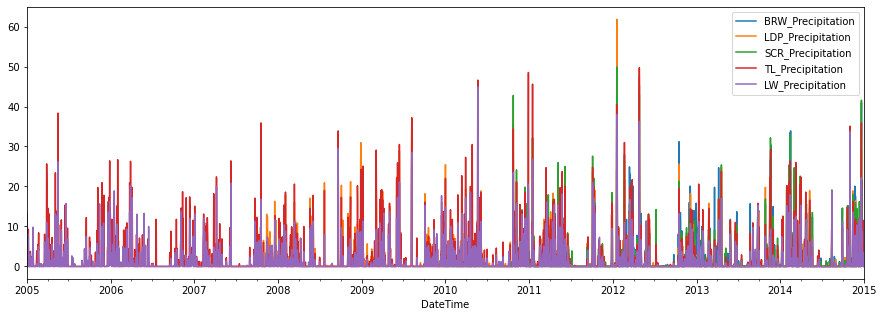

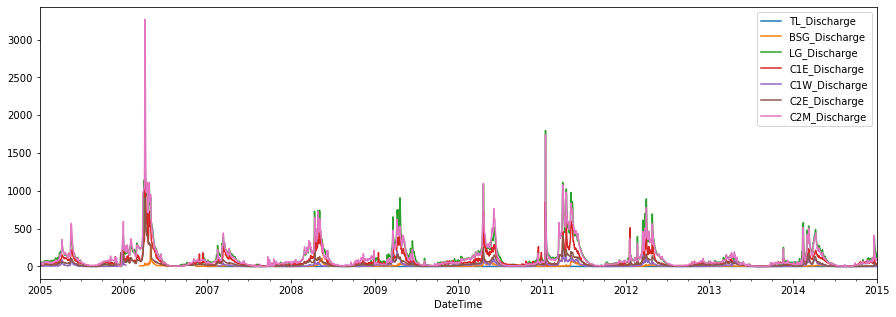

In [463]:
get_station_name(2)
get_data(2,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(2,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Sagehen
Sagehen
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'SolarRadiation', 'WindSpeed', 'SnowDepth']
Sagehen
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'SolarRadiation', 'WindSpeed', 'SnowDepth']


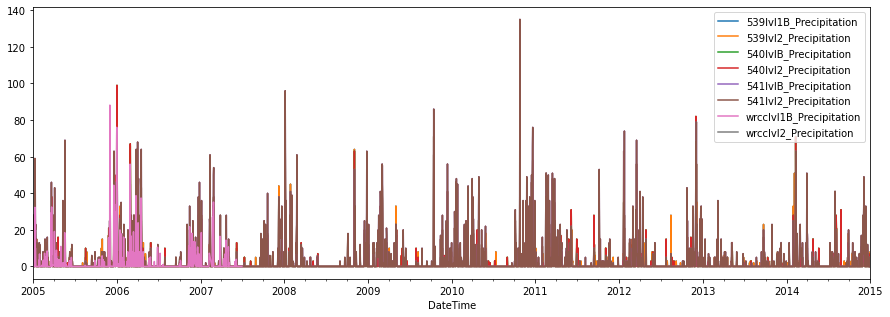

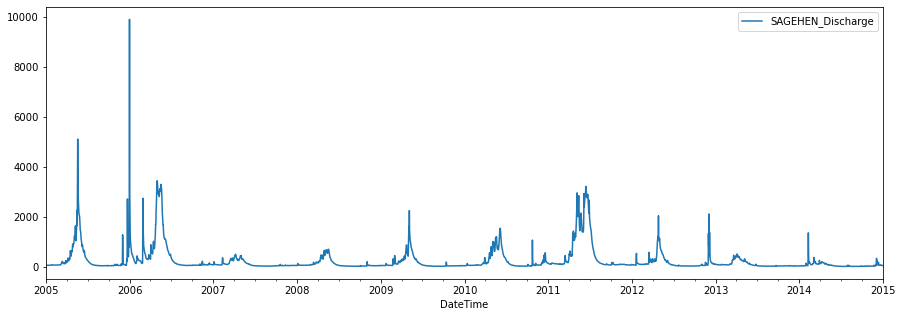

In [464]:
get_station_name(3)
get_data(3,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(3,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

HJAndrews
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']
HJAndrews
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'Snowmelt', 'VaporPressure', 'SoilTemperature', 'SoilMoisture']


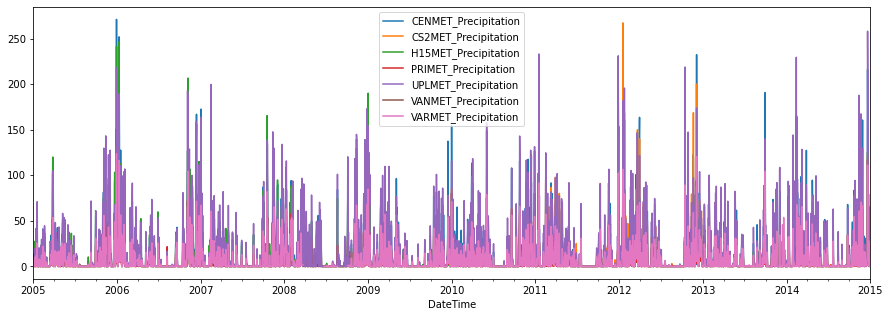

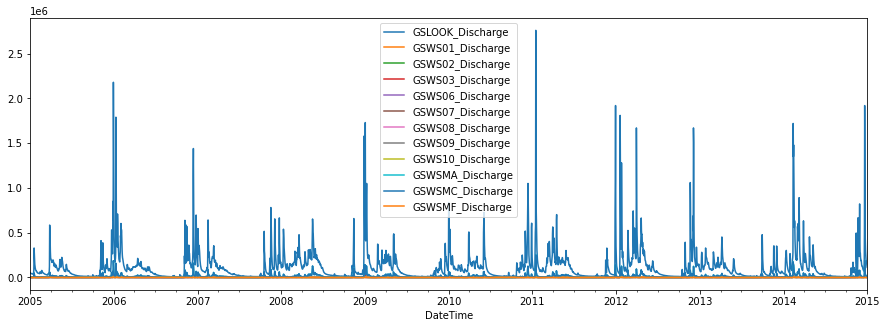

In [465]:
get_station_name(4)
get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Baltimore
Baltimore
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'SoilMoisture', 'SoilTemperature']
Baltimore
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'SoilMoisture', 'SoilTemperature']


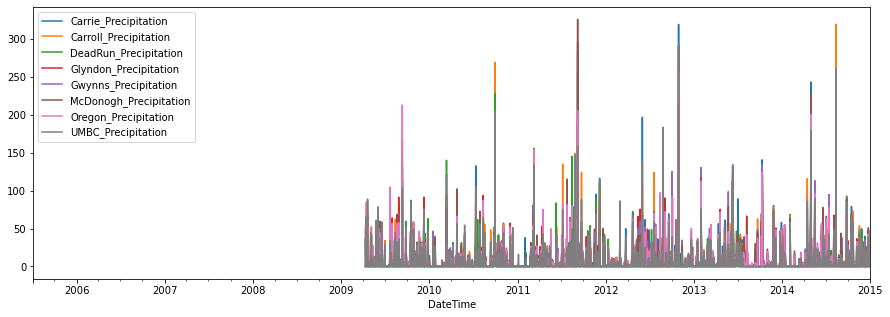

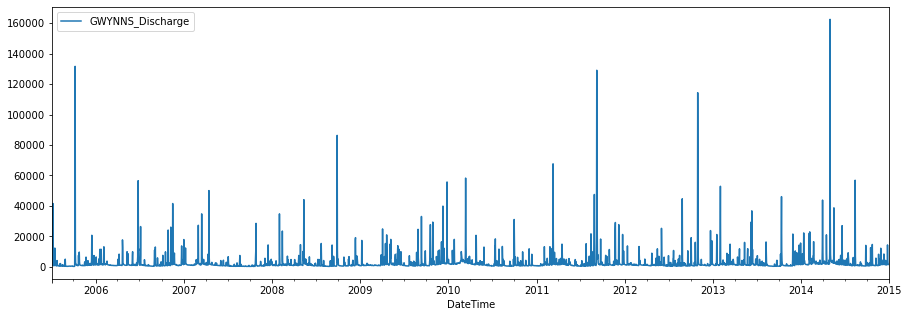

In [461]:
get_station_name(5)
get_data(5,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(5,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Bonanza
Bonanza
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'VaporPressure', 'SoilMoisture', 'SoilTemperature']
Bonanza
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'VaporPressure', 'SoilMoisture', 'SoilTemperature']


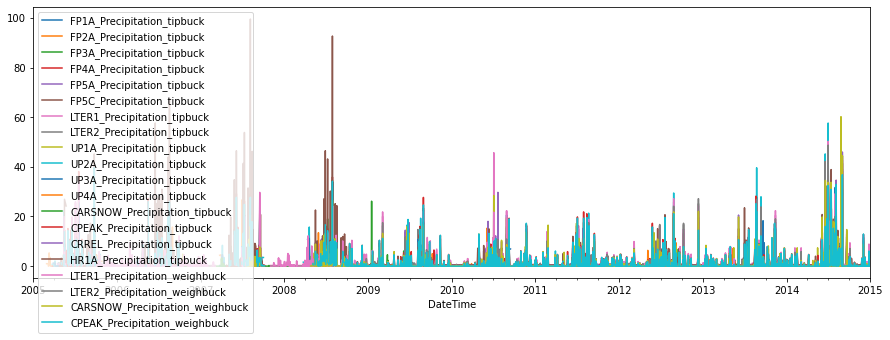

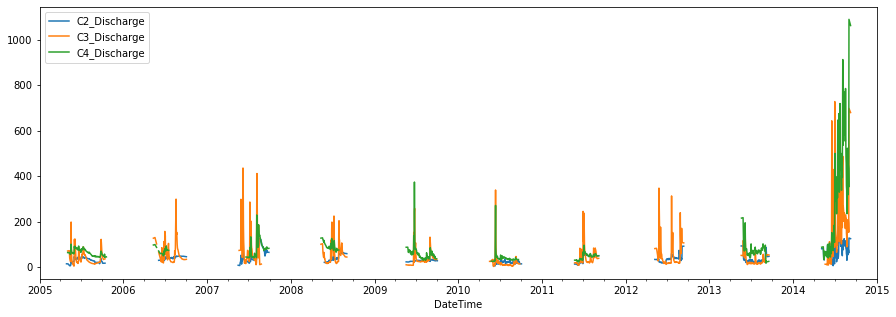

In [466]:
get_station_name(6)
get_data(6,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(6,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

CCE
CCE
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature']
CCE
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature']


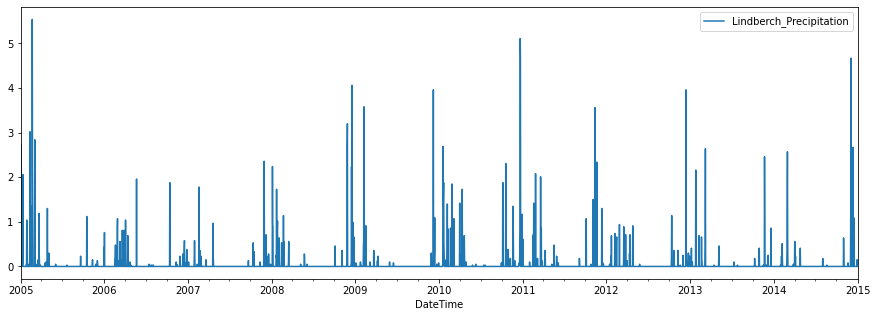

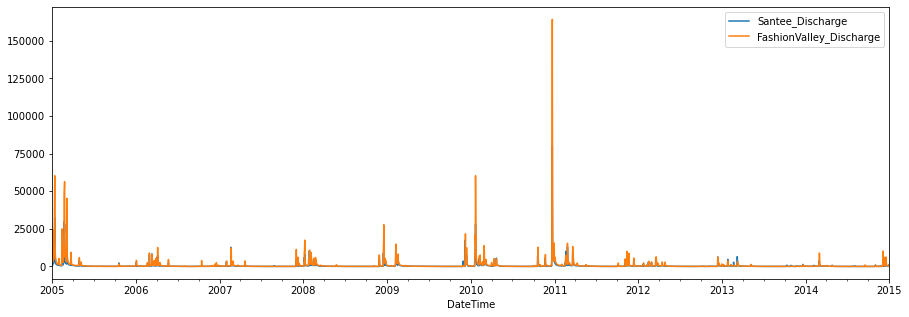

In [460]:
get_station_name(7)
get_data(7,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(7,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

CCE
CCE
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature']
CCE
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature']


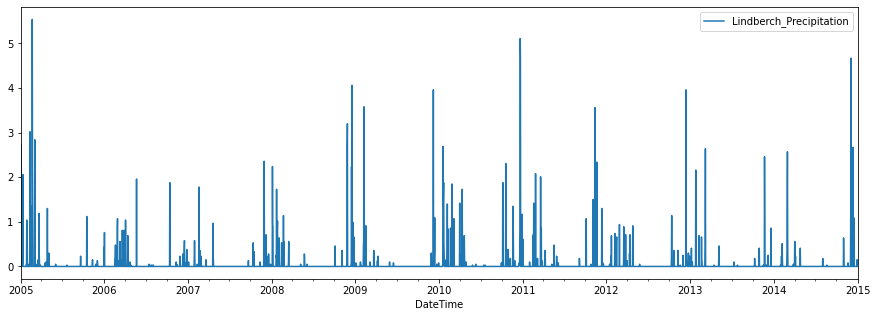

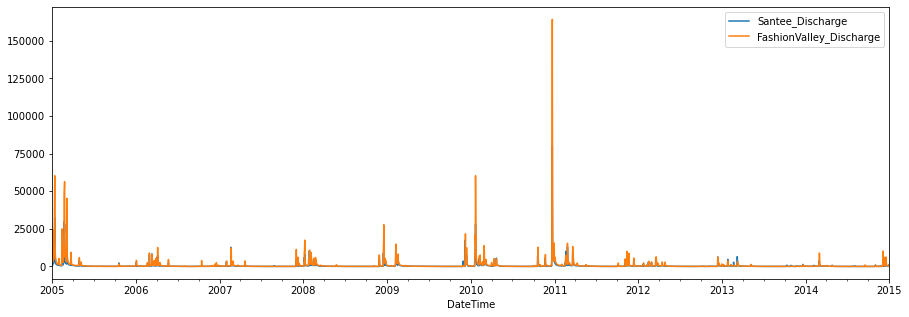

In [492]:
get_station_name(7)
get_data(7,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(7,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

CentralArizona
CentralArizona
Hydrometeorological variables in this watershed are:
['Discharge']
CentralArizona
Hydrometeorological variables in this watershed are:
['Discharge']


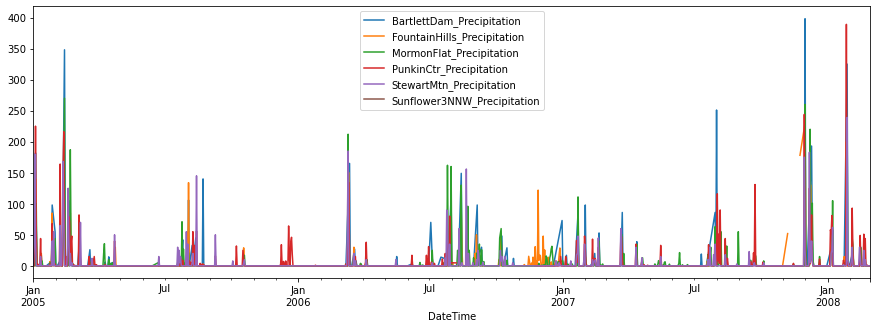

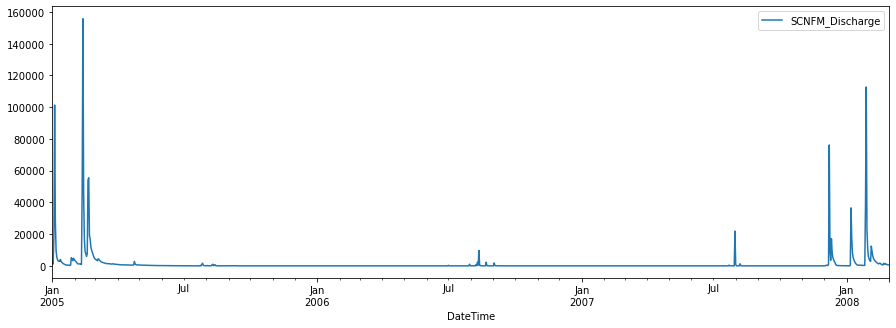

In [468]:
get_station_name(8)
get_data(8,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(8,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Coweeta
Coweeta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']
Coweeta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


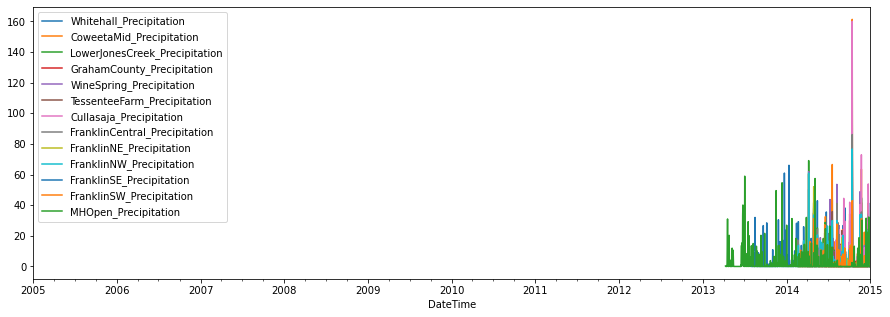

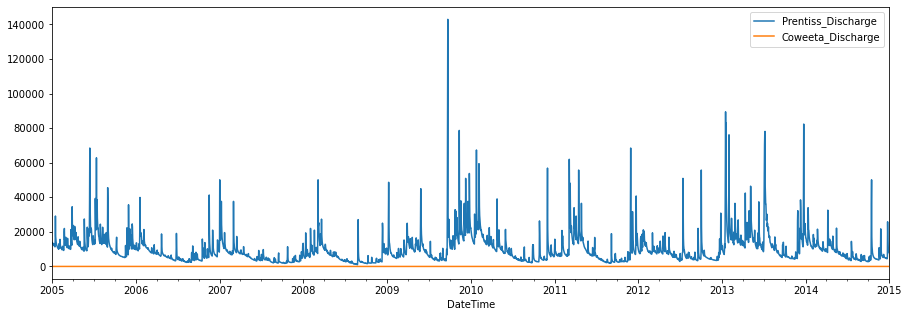

In [469]:
##########
get_station_name(9)
get_data(9,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(9,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Florida
Florida
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'WindDirection', 'WindSpeed']
Florida
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'WindDirection', 'WindSpeed']


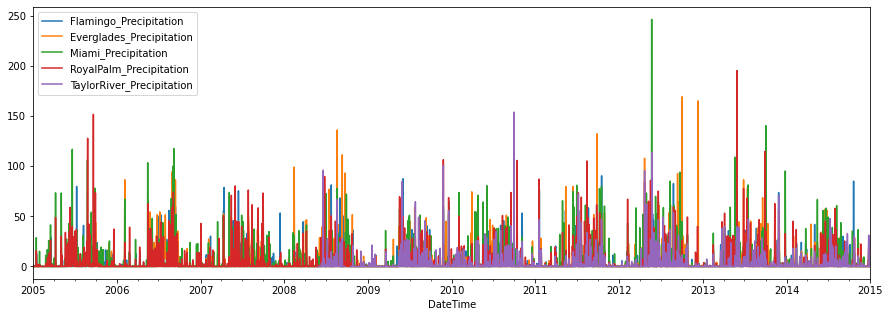

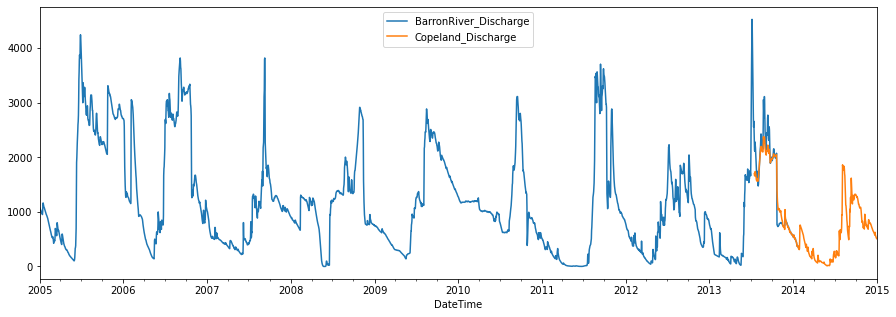

In [470]:
##########
get_station_name(10)
get_data(10,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(10,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Georgia
Georgia
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection']
Georgia
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection']


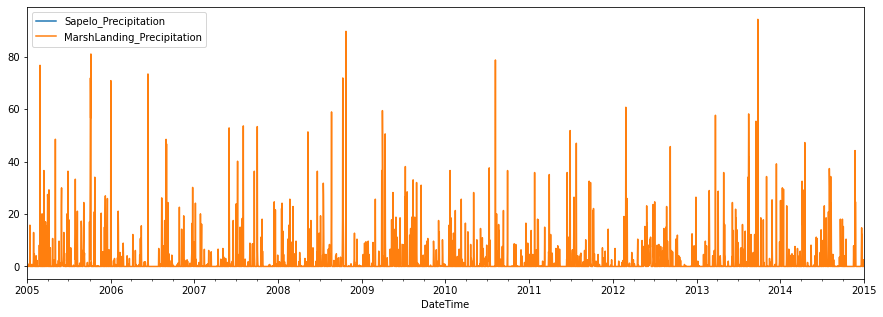

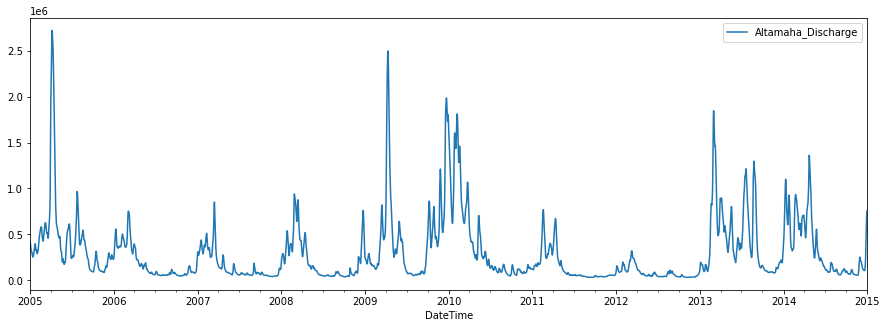

In [471]:
##########
get_station_name(11)
get_data(11,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(11,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Harvard
Harvard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'SoilMoisture']
Harvard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SWE', 'SnowDepth', 'SoilMoisture']


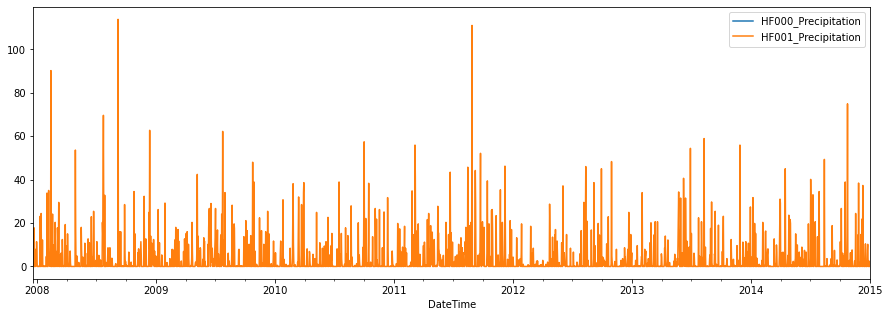

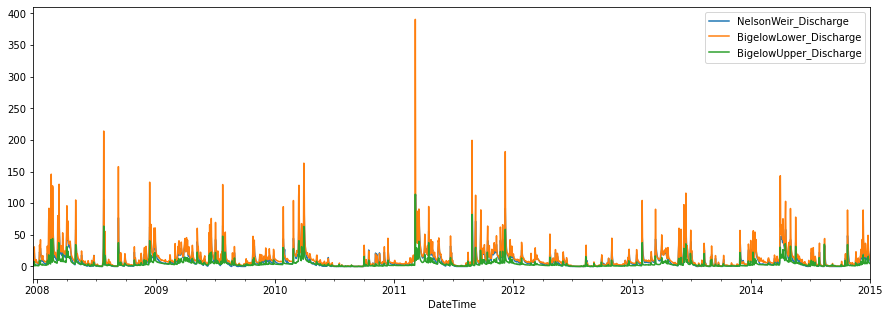

In [472]:
##########
get_station_name(12)
get_data(12,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(12,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Hubbard
Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']
Hubbard
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'WindDirection', 'WindSpeed', 'VaporPressure']


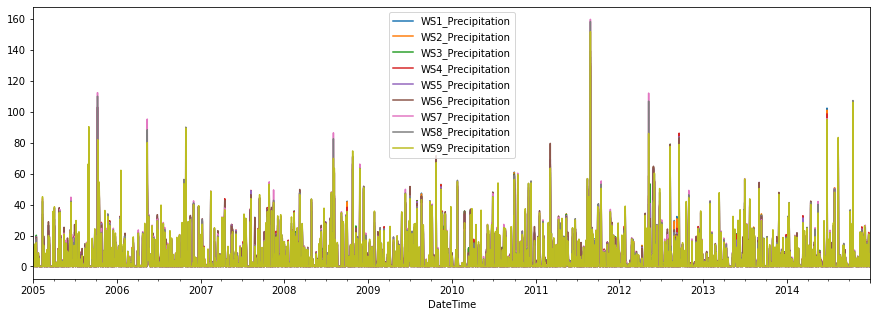

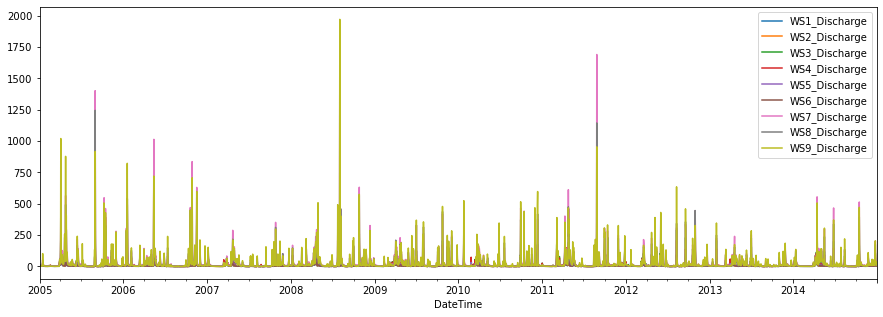

In [473]:
##########
get_station_name(13)
get_data(13,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(13,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Jornada
Jornada
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed']
Jornada
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed']


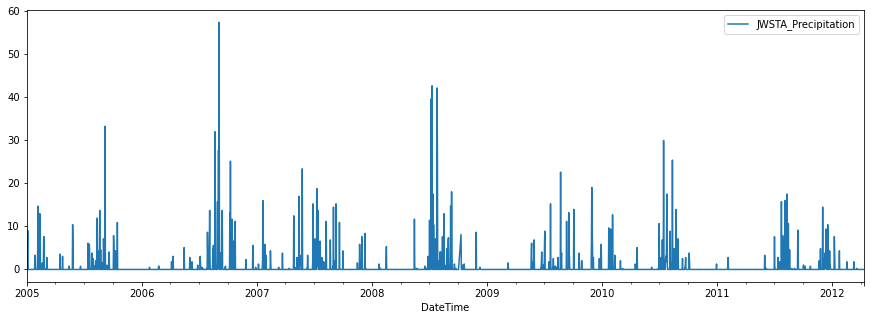

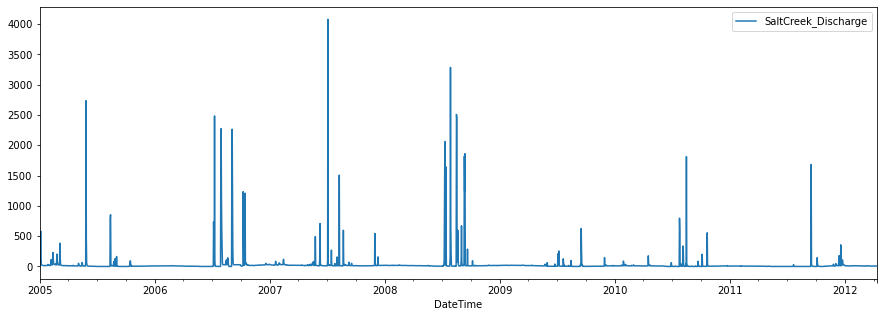

In [474]:
##########
get_station_name(14)
get_data(14,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(14,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Kellogg
Kellogg
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth']
Kellogg
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth']


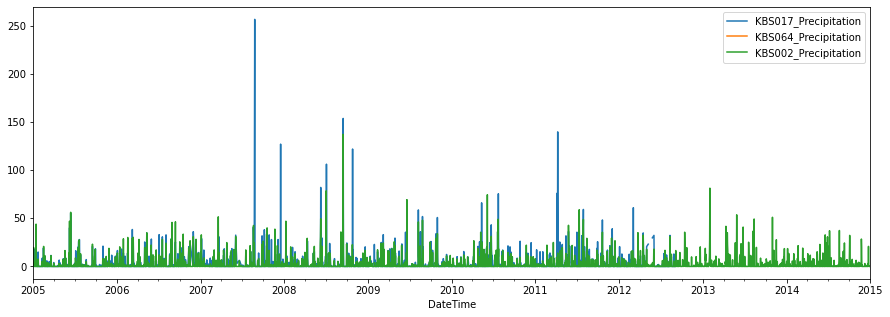

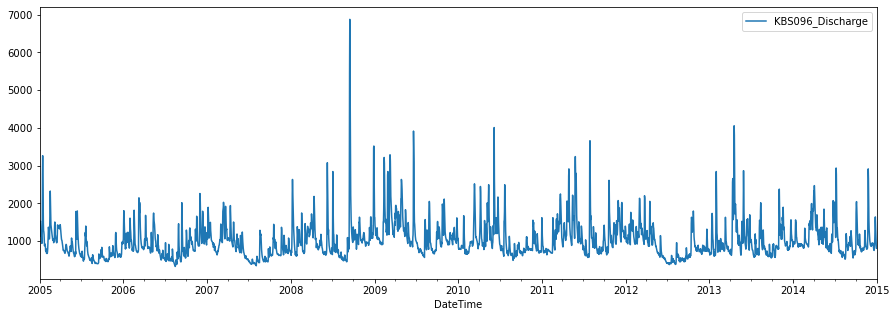

In [475]:
##########
get_station_name(15)
get_data(15,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(15,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

KonzaPrairie
KonzaPrairie
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed']
KonzaPrairie
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed']


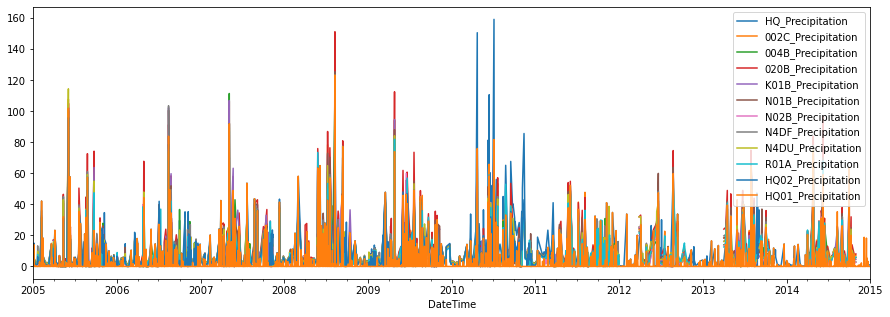

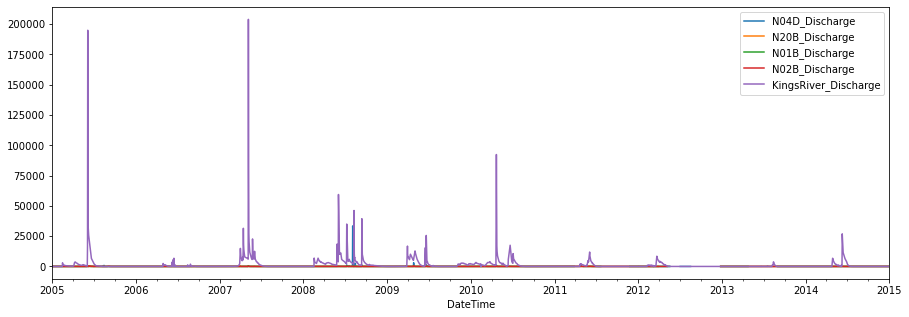

In [476]:
##########
get_station_name(16)
get_data(16,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(16,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

NGA
NGA
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']
NGA
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']


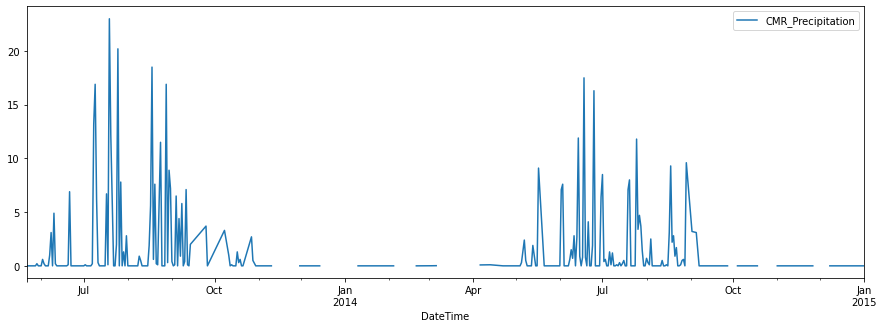

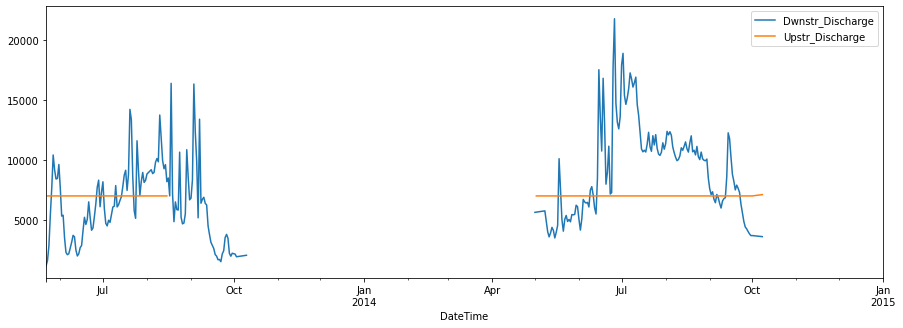

In [477]:
##########
get_station_name(17)
get_data(17,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(17,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

PlumIsland
PlumIsland
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity']
PlumIsland
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity']


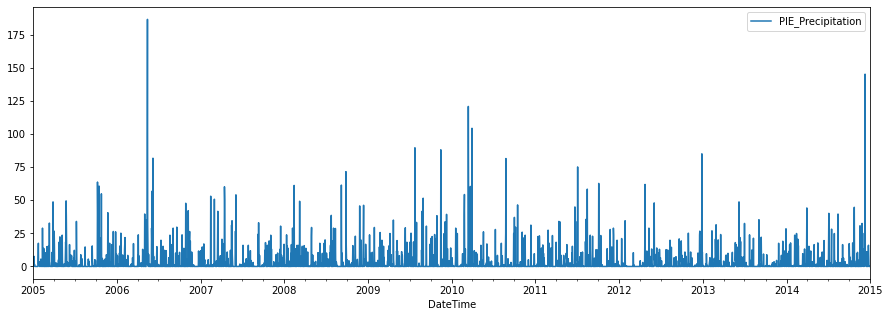

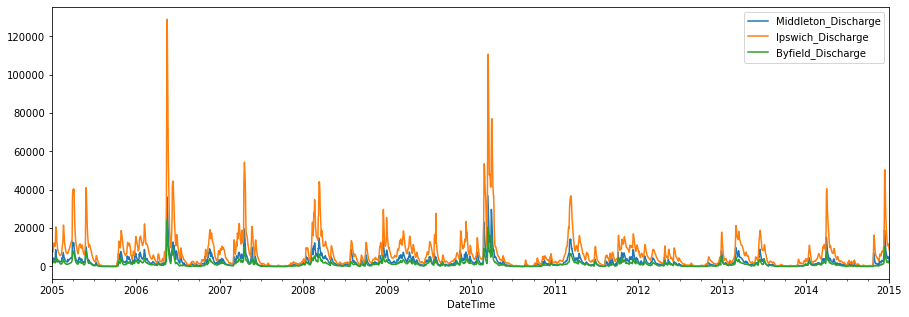

In [478]:
##########
get_station_name(18)
get_data(18,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(18,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Sevilleta
Sevilleta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']
Sevilleta
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


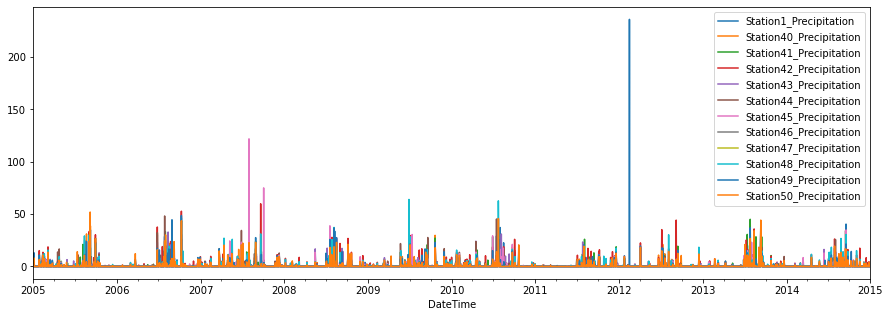

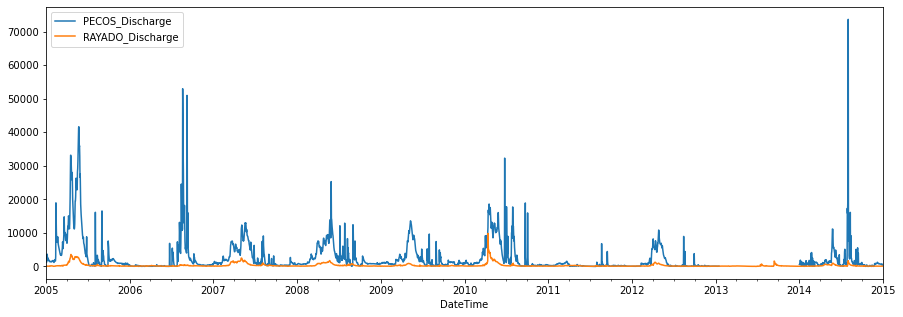

In [479]:
##########
get_station_name(19)
get_data(19,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(19,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Boulder
Boulder
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'SnowDepth', 'SoilMoisture']
Boulder
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindSpeed', 'WindDirection', 'SnowDepth', 'SoilMoisture']


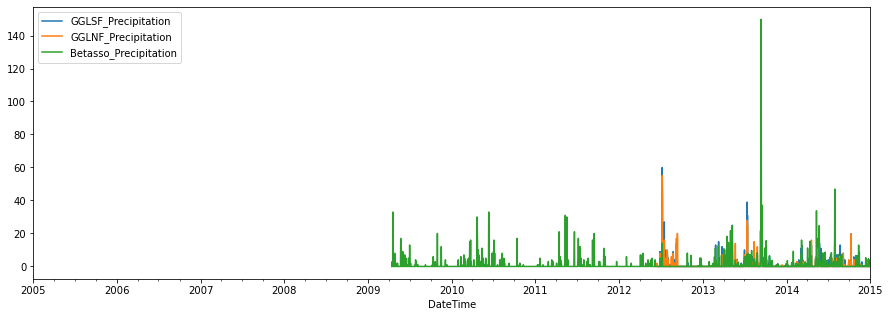

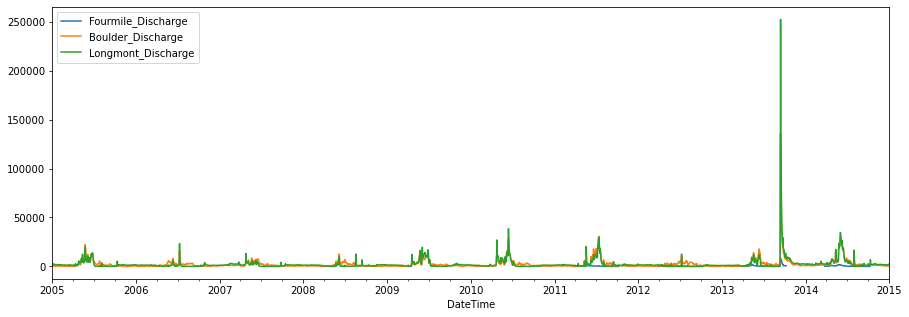

In [480]:
##########
get_station_name(20)
get_data(20,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(20,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Catalina
Catalina
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SnowDepth', 'SoilMoisture']
Catalina
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SnowDepth', 'SoilMoisture']


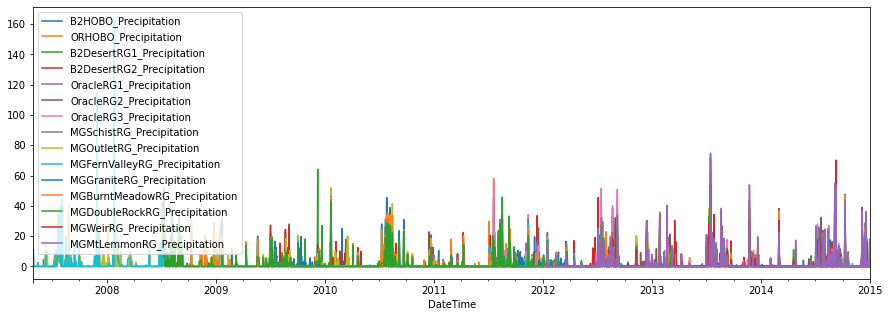

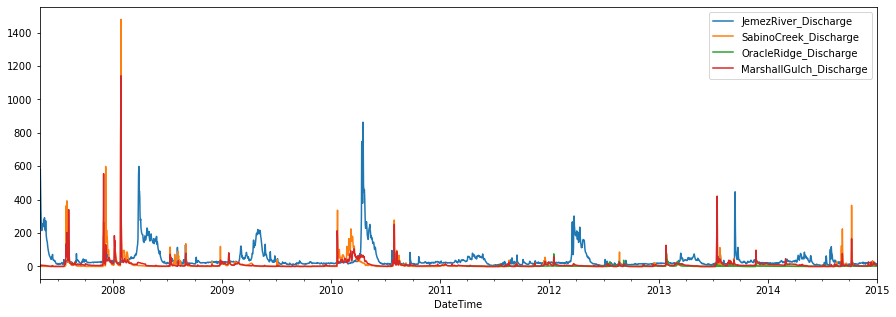

In [481]:
##########
get_station_name(21)
get_data(21,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(21,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Jemez
Jemez
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']
Jemez
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']


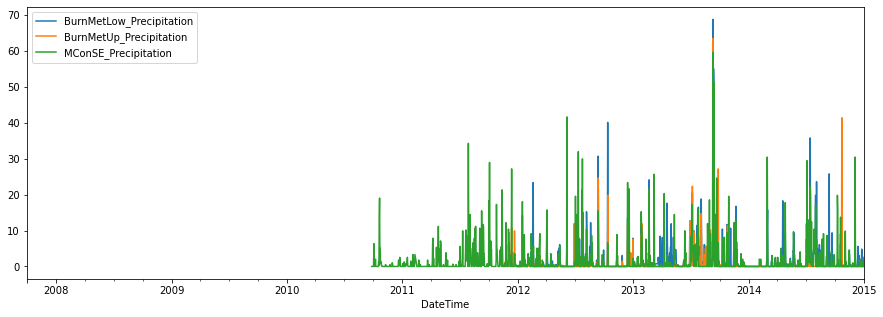

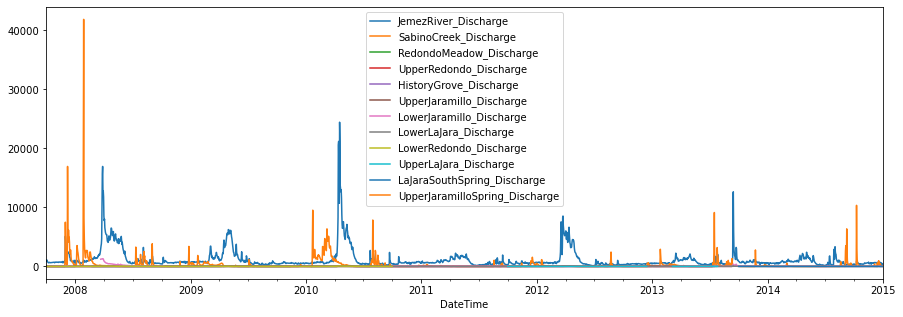

In [482]:
##########
get_station_name(22)
get_data(22,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(22,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

WhiteClay
WhiteClay
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SoilMoisture', 'SoilTemperature']
WhiteClay
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SoilMoisture', 'SoilTemperature']


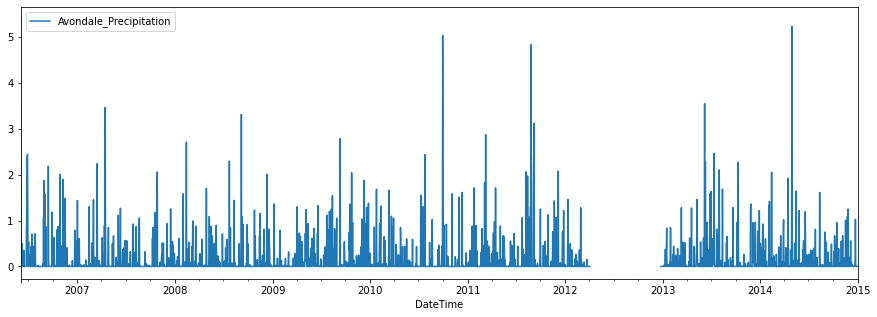

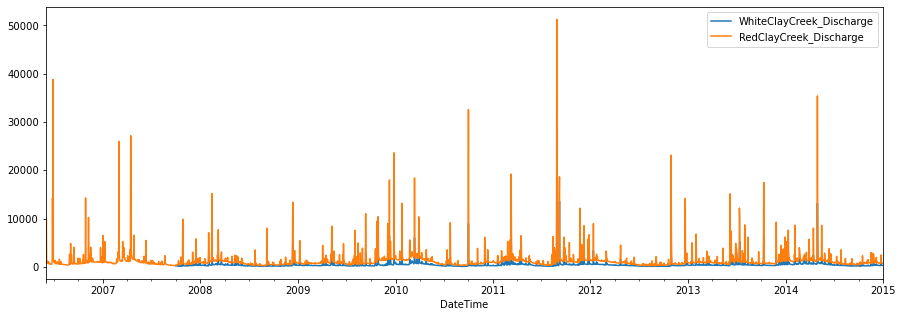

In [483]:
##########
get_station_name(23)
get_data(23,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(23,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Luquillo
Luquillo
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']
Luquillo
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'VaporPressure', 'SoilMoisture']


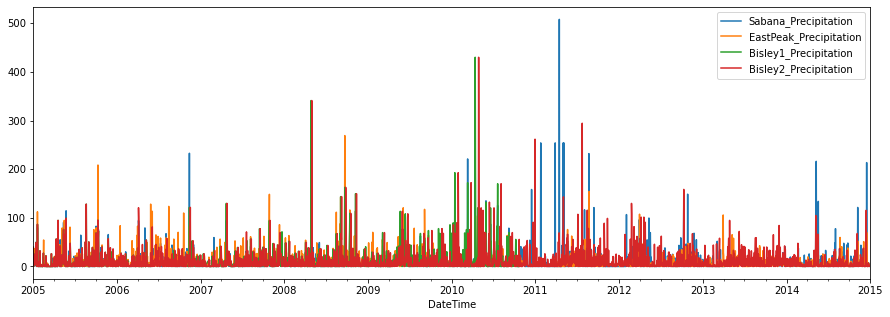

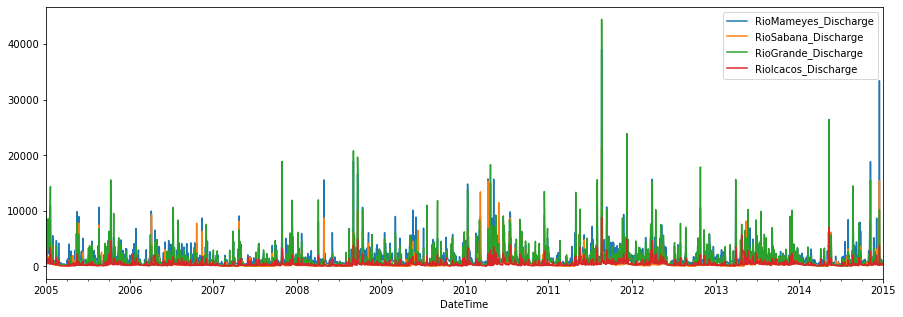

In [485]:
##########
get_station_name(24)
get_data(24,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(24,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Reynolds
Reynolds
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'VaporPressure', 'SoilMoisture']
Reynolds
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'VaporPressure', 'SoilMoisture']


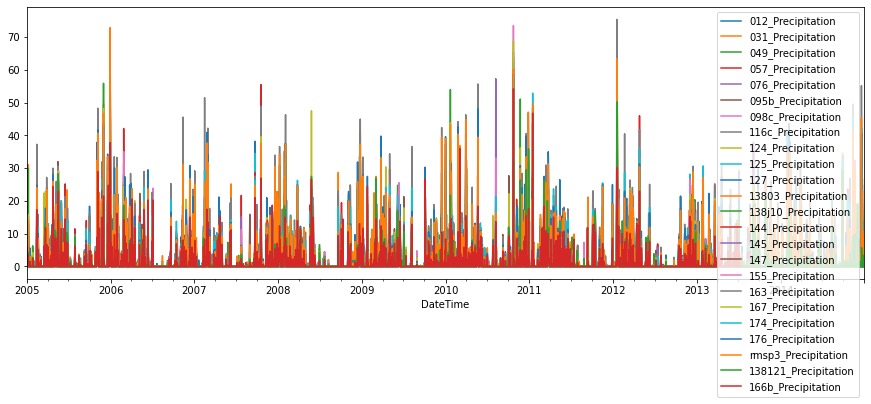

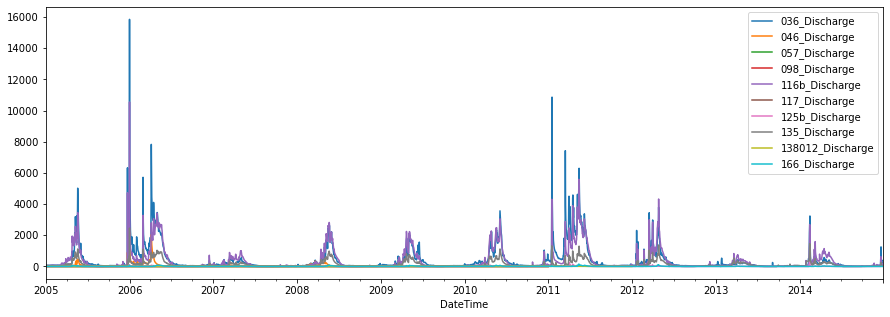

In [486]:
##########
get_station_name(25)
get_data(25,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(25,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

ShaleHill
ShaleHill
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SoilMoisture', 'SoilTemperature']
ShaleHill
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'SoilMoisture', 'SoilTemperature']


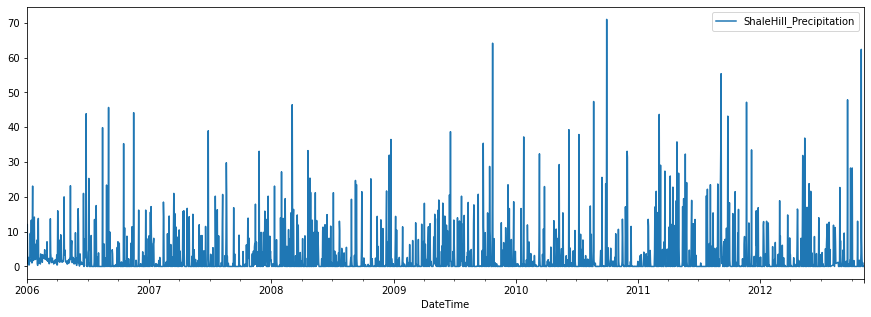

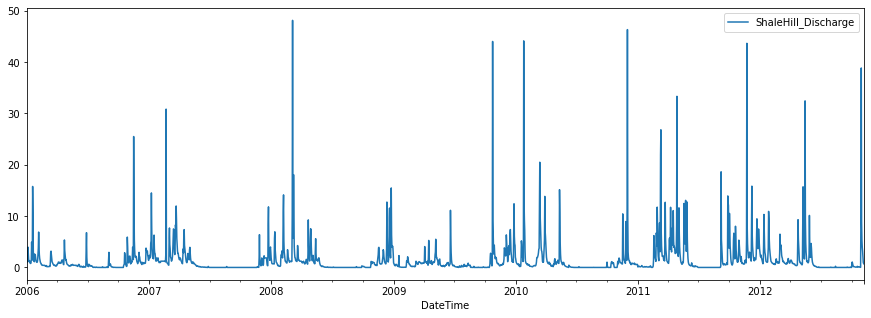

In [487]:
##########
get_station_name(26)
get_data(26,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(26,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

SanJoaquin
SanJoaquin
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SoilMoisture']
SanJoaquin
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SoilMoisture']


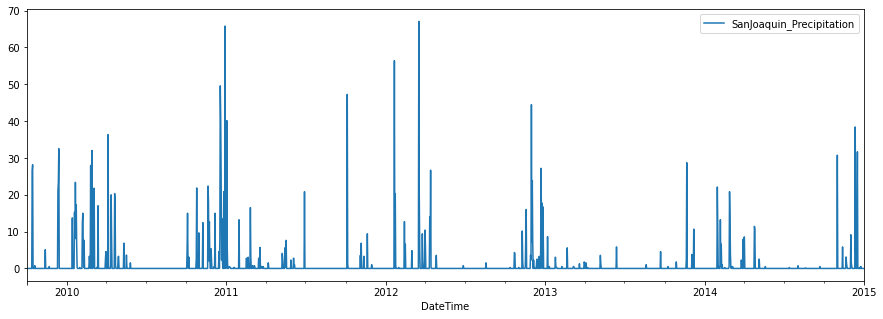

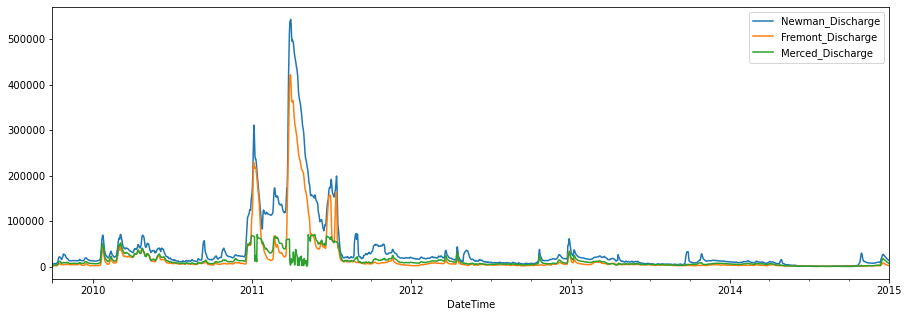

In [488]:
##########
get_station_name(27)
get_data(27,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(27,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Providence
Providence
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']
Providence
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']


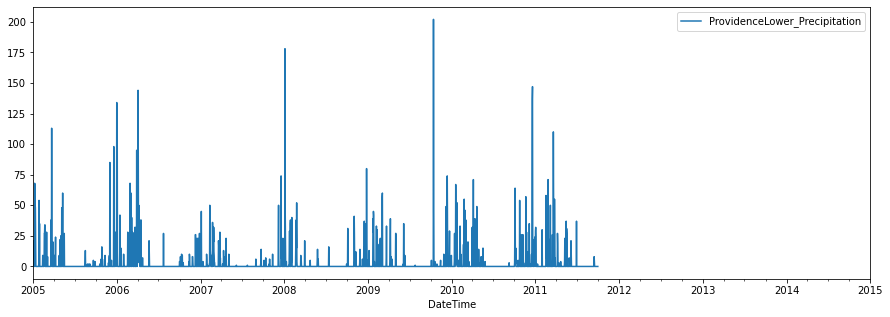

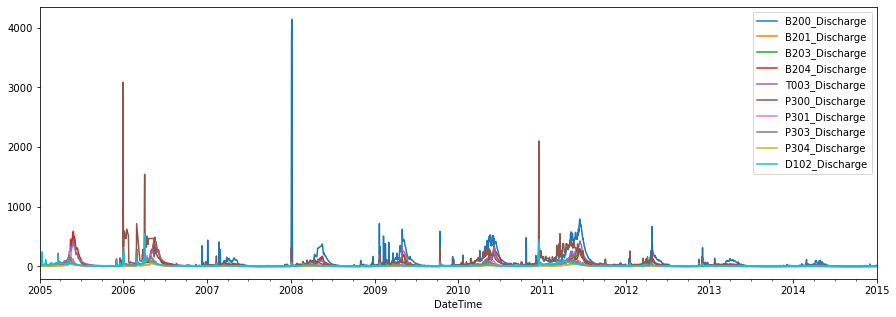

In [489]:
##########
get_station_name(28)
get_data(28,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(28,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Wolverton
Wolverton
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']
Wolverton
Hydrometeorological variables in this watershed are:
['Discharge', 'Precipitation', 'AirTemperature', 'SolarRadiation', 'RelativeHumidity', 'WindDirection', 'WindSpeed', 'SnowDepth', 'SoilMoisture']


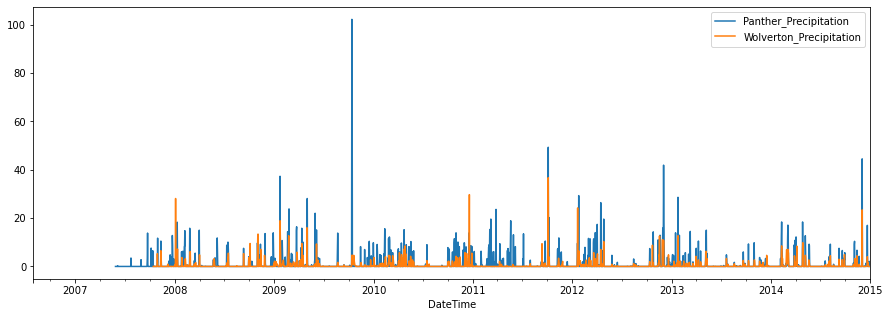

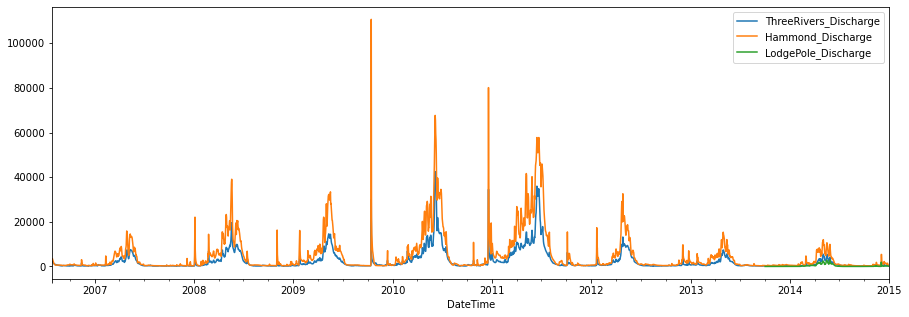

In [490]:
##########
get_station_name(29)
get_data(29,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(29,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])

Calhoun
Calhoun
Hydrometeorological variables in this watershed are:
['Discharge']
Calhoun
Hydrometeorological variables in this watershed are:
['Discharge']


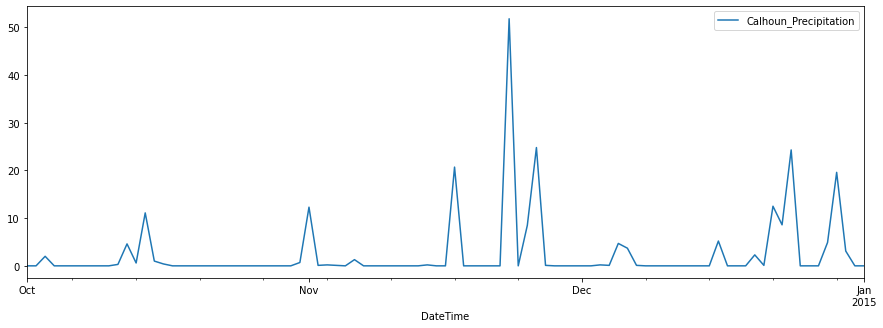

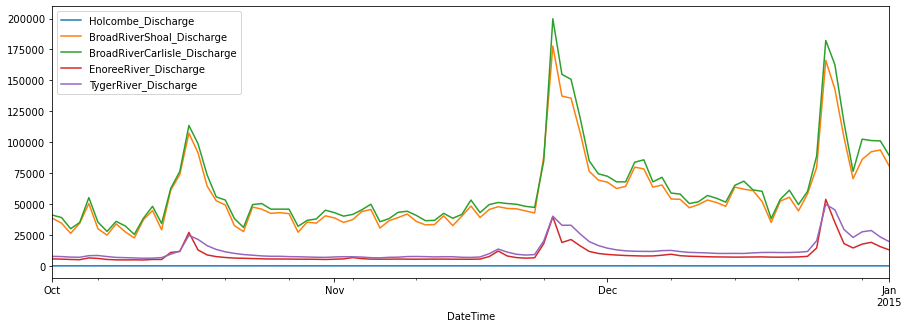

In [491]:
##########
get_station_name(30)
get_data(30,['Precipitation']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])
get_data(30,['Discharge']).loc['2005-1-1':'2015-1-1'].plot(figsize = [15,5])